In [1]:
from pran_model.PRAN import PRAN
from pran_model.TransferModel import TransferModel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

In [30]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold

def testPRAN(df, label, folds):
    kf = StratifiedKFold(n_splits=folds)
    pran_precisions = []
    pran_recalls = []
    pran_f1 = []

    X = df[[col for col in df.columns if col != label]].to_numpy()
    y = df[label].to_numpy()
    epoch = 0
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        X_val = sc.transform(X_val)

        pran = PRAN(shape = X_train.shape[1])
        pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-3, lr_rb = 1e-3, l2_pb = 1e-5, l2_rb = 1e-5, beta_pb = 0, beta_rb = 5)
        # pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-3, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 3)
        
        pran.plotPR()
        # pran.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 4, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 0, l2_rb = 0, beta_pb = 0, beta_rb = 5, X_test = X_test, y_test = y_test)
        # pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 20, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 4)
        y_pred = pran.predict(X_test)
        y_pred = (y_pred>0.5).float()
        pran_precisions.append(precision_score(y_test, y_pred))
        pran_recalls.append(recall_score(y_test, y_pred))
        pran_f1.append(f1_score(y_test, y_pred))

        print(f"Epoch: {epoch}")
        epoch += 1
        
    print("Median PRAN Precision: ", np.median(pran_precisions))
    print("Median PRAN Recall: ", np.median(pran_recalls))
    print("Median PRAN F1: ", np.median(pran_f1))

    return pran_f1, pran_precisions, pran_recalls

In [31]:
df = pd.read_csv('../src/data/parkinsons.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


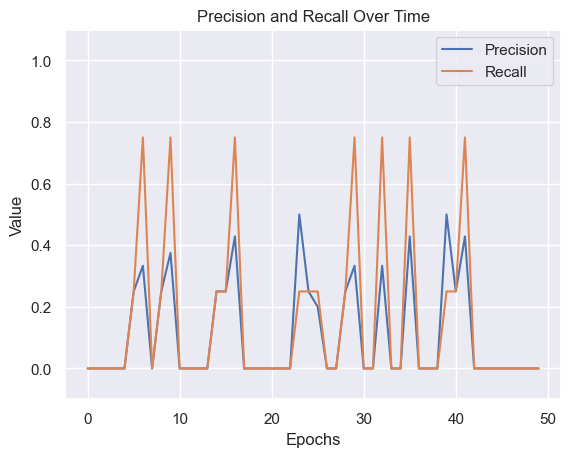

Epoch: 0


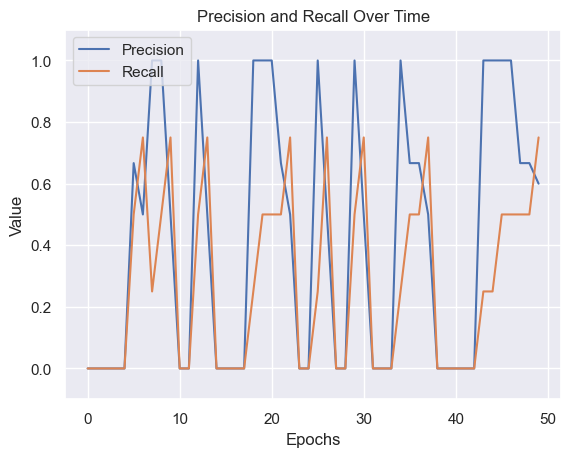

Epoch: 1


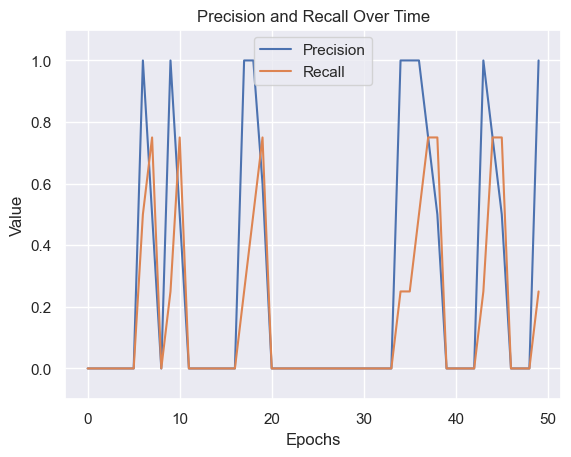

Epoch: 2


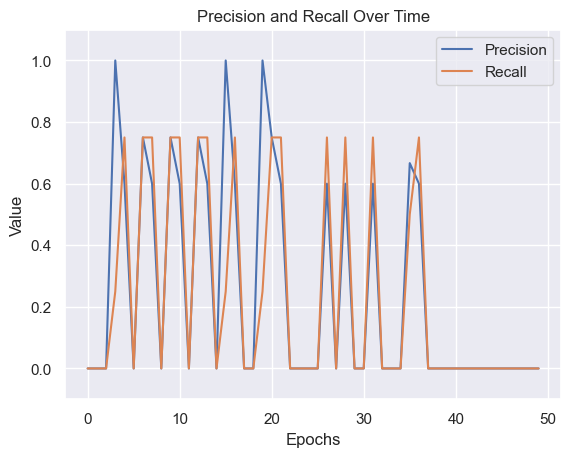

Epoch: 3


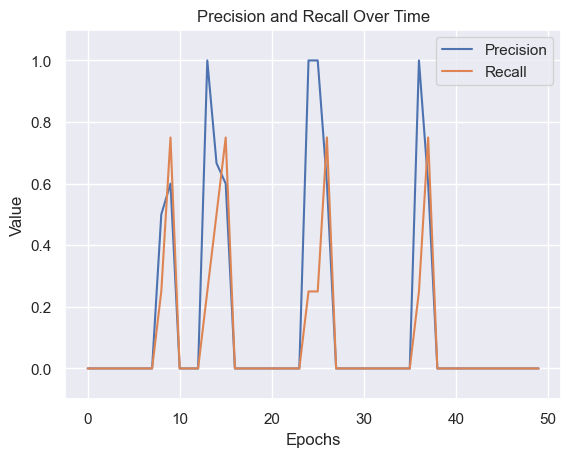

Epoch: 4
Median PRAN Precision:  0.0
Median PRAN Recall:  0.0
Median PRAN F1:  0.0


([0.0, 0.375, 0.4, 0.0, 0.0],
 [0.0, 0.42857142857142855, 0.6, 0.0, 0.0],
 [0.0, 0.3333333333333333, 0.3, 0.0, 0.0])

In [32]:
testPRAN(df, "status", 5)

RB Training - 
Epoch #0: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #1: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #2: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #3: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #4: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #5: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #6: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #7: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #8: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #9: 
Precision: 1.0
Recall: 1.0 

RB Training - 
Epoch #10: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #11: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #12: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #13: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #14: 
Precision: 0.75
Recall: 1.0 

PB Training - 
Epoch #15: 
Precision: 0.75
Recall: 1.0 

PB Training - 
Epoch #

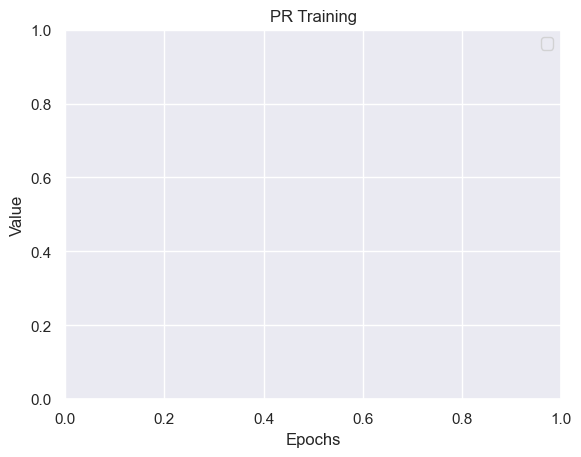

Epoch: 0
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #2: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #13: 
Precision: 0.625
Recall: 0.833333333333333

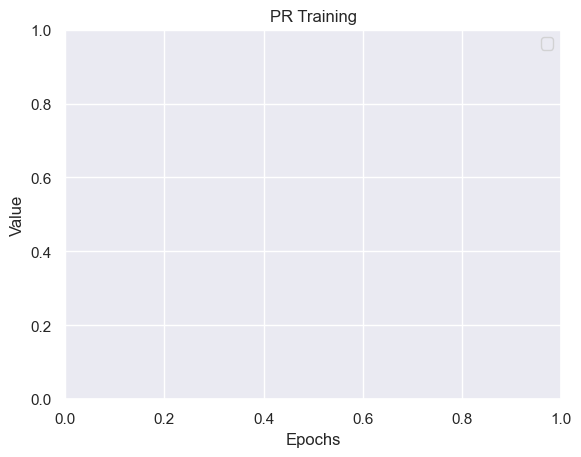

Epoch: 1
RB Training - 
Epoch #0: 
Precision: 1.0
Recall: 0.3333333333333333 

RB Training - 
Epoch #1: 
Precision: 0.8
Recall: 0.6666666666666666 

RB Training - 
Epoch #2: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Ep

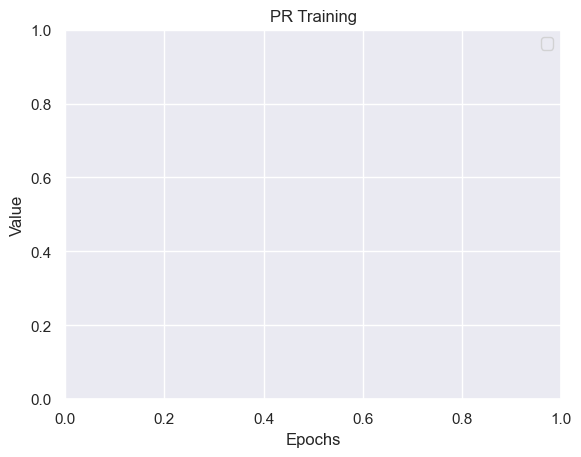

Epoch: 2
RB Training - 
Epoch #0: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #1: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #2: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #1

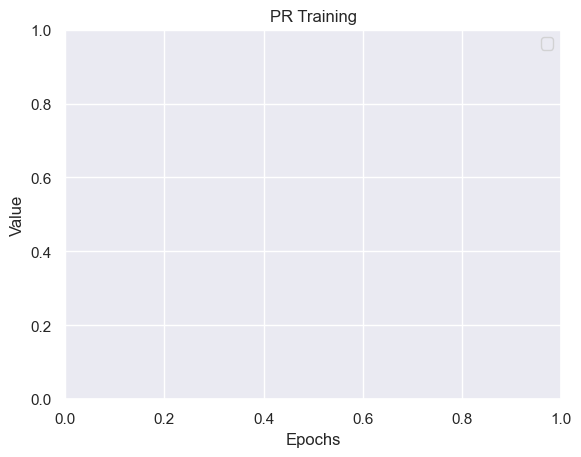

Epoch: 3
RB Training - 
Epoch #0: 
Precision: 0.45454545454545453
Recall: 0.8333333333333334 

PB Training - 
Epoch #1: 
Precision: 0.45454545454545453
Recall: 0.8333333333333334 

PB Training - 
Epoch #2: 
Precision: 0.45454545454545453
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.45454545454545453
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.45454545454545453
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.45454545454545453
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.5
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.5
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.5
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 0.625
Rec

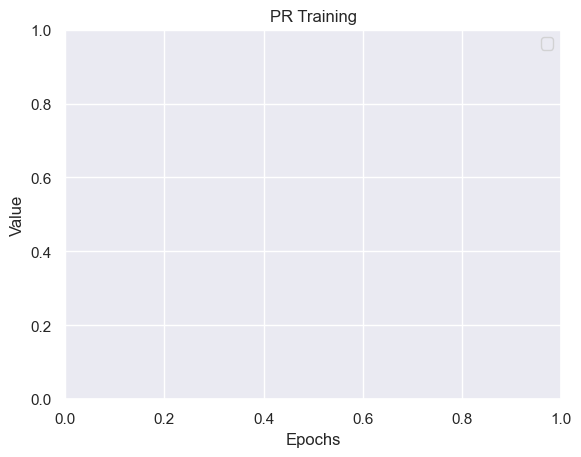

Epoch: 4
Median PRAN Precision:  0.75
Median PRAN Recall:  0.6666666666666666
Median PRAN F1:  0.6428571428571429


([0.625, 0.625, 0.7142857142857142, 0.7586206896551724, 0.6428571428571429],
 [0.5882352941176471,
  0.5882352941176471,
  0.7692307692307693,
  0.8461538461538461,
  0.75],
 [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6875, 0.5625])

In [95]:
testPRAN(df, "class", 5)

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #14: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #15: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #16: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #17: 
Precision: 1.0
Recall: 0.25

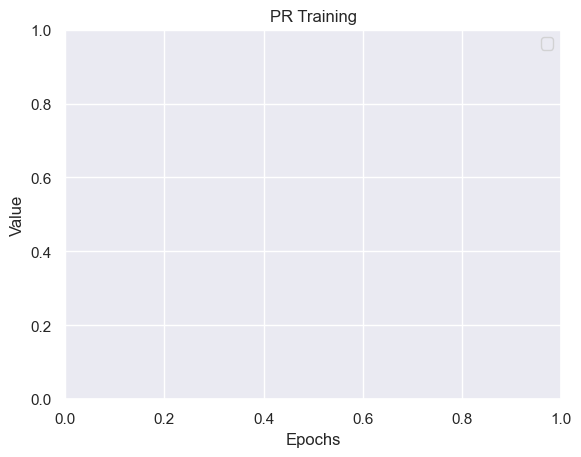

Epoch: 0
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #14: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #15: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #16: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #17: 
Precision: 0.0
Recall:

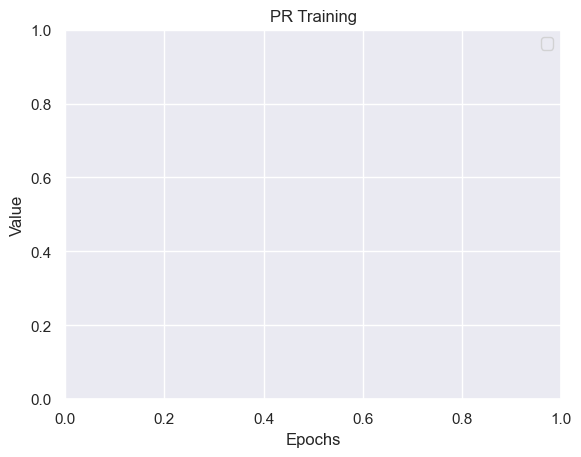

Epoch: 1
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #13: 
Precision: 0.5
Recall: 0.25 

RB Training - 
Epoch #14: 
Precision: 0.5
Recall: 0.25 

RB Training - 
Epoch #15: 
Precision: 0.5
Recall: 0.25 

RB Training - 
Epoch #16: 
Precision: 0.5
Recall: 0.25 

RB Training - 
Epoch #17: 
Precision: 0.5
Re

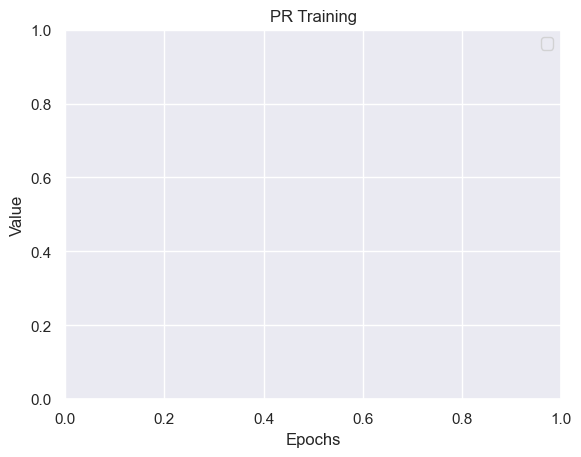

Epoch: 2
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #14: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #15: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #16: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #17: 
Precision: 0.0
Recall:

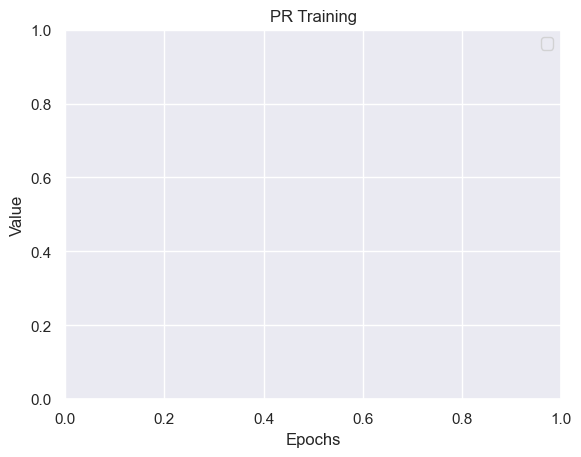

Epoch: 3
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #8: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #9: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #10: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #11: 
Precision: 0.5
Recall: 0.25 

RB Training - 
Epoch #12: 
Precision: 0.5
Recall: 0.25 

RB Training - 
Epoch #13: 
Precision: 0.5
Recall: 0.25 

RB Training - 
Epoch #14: 
Precision: 0.3333333333333333
Recall: 0.25 

RB Training - 
Epoch #15: 
Precision: 0.3333333333333333
Recall: 0.25 

RB Training - 
Epoch #16: 
Precision: 0.3333333333333333
Recall: 0

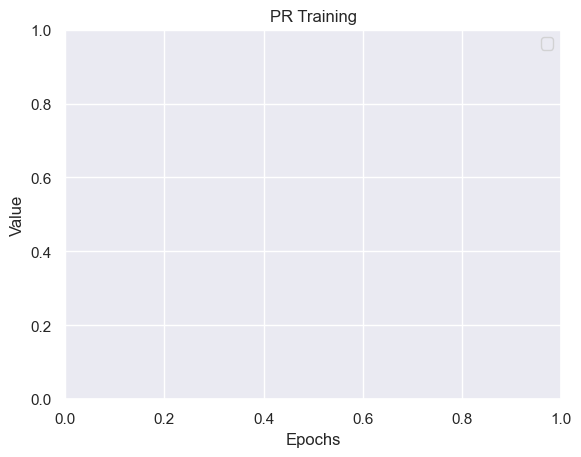

Epoch: 4
Median PRAN Precision:  0.46153846153846156
Median PRAN Recall:  0.5555555555555556
Median PRAN F1:  0.5217391304347826


([0.30769230769230765,
  0.5333333333333333,
  0.5217391304347826,
  0.5,
  0.5217391304347826],
 [0.5, 0.8, 0.46153846153846156, 0.45454545454545453, 0.42857142857142855],
 [0.2222222222222222, 0.4, 0.6, 0.5555555555555556, 0.6666666666666666])

In [149]:
testPRAN(df, "outcome", 5)

tensor([[ 0.8514],
        [ 1.9682],
        [-2.1678]], grad_fn=<AddmmBackward0>)
Epoch #0, RB - 
 Precision: 0.5 
 Recall: 1.0

Num pos samples:  1 


tensor([[ 0.2134],
        [ 3.7850],
        [-4.3050]], grad_fn=<AddmmBackward0>)
Epoch #1, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


tensor([[-0.9027],
        [ 3.5724],
        [-4.0079]], grad_fn=<AddmmBackward0>)
Epoch #2, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


tensor([[-1.9156],
        [ 4.0737],
        [-4.5243]], grad_fn=<AddmmBackward0>)
Epoch #3, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


tensor([[-3.7273],
        [ 5.5381],
        [-5.2271]], grad_fn=<AddmmBackward0>)
Epoch #4, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


tensor([[-4.8978],
        [ 6.0865],
        [-6.3336]], grad_fn=<AddmmBackward0>)
Epoch #5, RB - 
 Precision: 1.0 
 Recall: 1.0

Num pos samples:  1 


tensor([[-6.0493],
        [ 7.6105],
        [-7.0823]], grad_fn=<AddmmBack

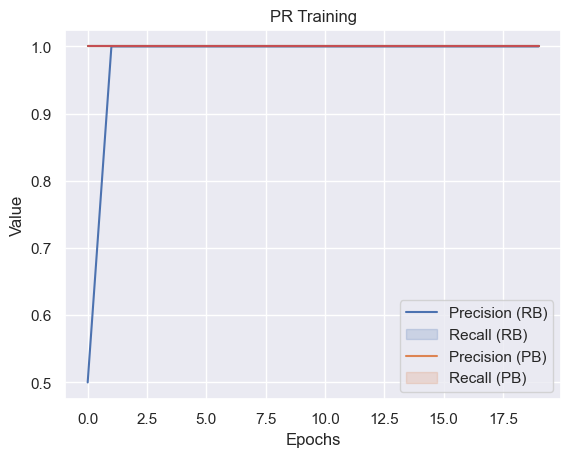

Precision Score:  0.6666666666666666
Recall Score:  0.6666666666666666


In [5]:
import warnings
warnings.filterwarnings("ignore")
pran = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran.fit(X_train = X_train, y_train = y_train, epochs = 20, batch_size = 8, lr_pb = 1e-3, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 5, X_test = X_test, y_test = y_test)
pran.plotPR()
y_pred = pran.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

In [3]:
def testAllModels(X_train, y_train, X_test, y_test):

    lr = LogisticRegression(random_state=1)
    svm = SVC(random_state=1)
    gnb = GaussianNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()

    lr.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    gnb.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)

    y_pred_lr = lr.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    y_pred_gnb = gnb.predict(X_test)
    y_pred_knn = knn.predict(X_test)
    y_pred_dt = dt.predict(X_test)

    return [[precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_lr)], [precision_score(y_test, y_pred_svm), recall_score(y_test, y_pred_svm), f1_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_svm)], [precision_score(y_test, y_pred_gnb), recall_score(y_test, y_pred_gnb), f1_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_gnb)], [precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_knn)], [precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_dt)]]

In [26]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

def kFoldCrossVal(df, label, folds, data):
    kf = StratifiedKFold(n_splits=folds)
    nn_batch_size = 8

    # PRAN Results
    pran_precisions = ["PRAN (No SMOTE) Precisions"]
    pran_recalls = ["PRAN (No SMOTE) Recalls"]
    pran_f1 = ["PRAN (No SMOTE) F1"]
    pran_accuracies = ["PRAN (No SMOTE) Accuracies"]
    pran_resampled_precisions = ["PRAN (SMOTE) Precisions"]
    pran_resampled_recalls = ["PRAN (SMOTE) Recalls"]
    pran_resampled_f1 = ["PRAN (SMOTE) F1_Scores"]
    pran_resampled_accuracies = ["PRAN (SMOTE) Accuracies"]

    # NN Results
    control_precisions = ["Control (No SMOTE) Precisions"]
    control_recalls = ["Control (No SMOTE) Recalls"]
    control_f1 = ["Control (No SMOTE) F1"]
    control_accuracies = ["Control (No SMOTE) Accuracies"]
    control_resampled_precisions = ["Control (SMOTE) Precisions"]
    control_resampled_recalls = ["Control (SMOTE) Recalls"]
    control_resampled_f1 = ["Control (SMOTE) F1_Scores"]
    control_resampled_accuracies = ["Control (SMOTE) Accuracies"]

    # Standard Classifiers Results
    standard_precisions = [["LR (No SMOTE) Precisions"], ["SVM (No SMOTE) Precisions"], ["GNB (No SMOTE) Precisions"], ["kNN (No SMOTE) Precisions"], ["DT (No SMOTE) Precisions"]]
    standard_recalls = [["LR (No SMOTE) Recalls"], ["SVM (No SMOTE) Recalls"], ["GNB (No SMOTE) Recalls"], ["kNN (No SMOTE) Recalls"], ["DT (No SMOTE) Recalls"]]
    standard_f1 = [["LR (No SMOTE) F1"], ["SVM (No SMOTE) F1"], ["GNB (No SMOTE) F1"], ["kNN (No SMOTE) F1"], ["DT (No SMOTE) F1"]]
    standard_accuracies = [["LR (No SMOTE) Accuracies"], ["SVM (No SMOTE) Accuracies"], ["GNB (No SMOTE) Accuracies"], ["kNN (No SMOTE) Accuracies"], ["DT (No SMOTE) Accuracies"]]
    standard_resampled_precisions = [["LR (SMOTE) Precisions"], ["SVM (SMOTE) Precisions"], ["GNB (SMOTE) Precisions"], ["kNN (SMOTE) Precisions"], ["DT (SMOTE) Precisions"]]
    standard_resampled_recalls = [["LR (SMOTE) Recalls"], ["SVM (SMOTE) Recalls"], ["GNB (SMOTE) Recalls"], ["kNN (SMOTE) Recalls"], ["DT (SMOTE) Recalls"]]
    standard_resampled_f1 = [["LR (SMOTE) F1_Scores"], ["SVM (SMOTE) F1_Scores"], ["GNB (SMOTE) F1_Scores"], ["kNN (SMOTE) F1_Scores"], ["DT (SMOTE) F1_Scores"]]
    standard_resampled_accuracies = [["LR (SMOTE) Accuracies"], ["SVM (SMOTE) Accuracies"], ["GNB (SMOTE) Accuracies"], ["kNN (SMOTE) Accuracies"], ["DT (SMOTE) Accuracies"]]

    # Cost sensitive learners
    svm_precisions = ["Penalized SVM Precisions"]
    svm_recalls = ["Penalized SVM Recall"]
    svm_f1 = ["Penalized SVM F1_Scores"]
    svm_accuracies = ["Penalized SVM Accuracies"]

    lr_precisions = ["Balanced LR Precisions"]
    lr_recalls = ["Balanced LR Recalls"]
    lr_f1 = ["Balanced LR F1_Scores"]
    lr_accuracies = ["Balanced LR Accuracies"]

    column_names = ["Run"]
    for i in range(folds):
        column_names.append(f"Fold #{i + 1}")
    total = pd.DataFrame(columns = column_names)

    # Split x and y
    X = df[[col for col in df.columns if col != label]].to_numpy()
    y = df[label].to_numpy()
    epoch = 0

    # Stratified K-Fold
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)

        # Regular
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        X_val = sc.transform(X_val)

        # SMOTE
        smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # -------PRAN-------

        pran = PRAN(shape = X_train.shape[1])

        if data == "hepatitis":
            pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-4, lr_rb = 1e-3, l2_pb = 1e-5, l2_rb = 1e-6, beta_pb = 0, beta_rb = 5)
            # pran.fit(X_train = X_train1, y_train = y_train1, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-4, lr_rb = 1e-3, l2_pb = 1e-5, l2_rb = 0, beta_pb = 0, beta_rb = 4)
        elif data == "hyperthyroid":
            nn_batch_size = 32
            pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 32, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 4)
        elif data == "wbpc":
            pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-3, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 3)
        elif data == "parkinson":
            pran.fit(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 4)

        print("Regular PRAN")
        pran.plotPR()

        y_pred = pran.predict(X_test)
        y_pred = (y_pred>0.5).float()
        pran_precisions.append(precision_score(y_test, y_pred))
        pran_recalls.append(recall_score(y_test, y_pred))
        pran_f1.append(f1_score(y_test, y_pred))
        pran_accuracies.append(accuracy_score(y_test, y_pred))

        # -------PRAN Resampled-------

        pran_resampled = PRAN(shape = X_train.shape[1])

        if data == "hepatitis":
            pran_resampled.fit(X_train = X_train_resampled, y_train = y_train_resampled, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-4, lr_rb = 1e-3, l2_pb = 1e-5, l2_rb = 1e-6, beta_pb = 0, beta_rb = 5)
            # pran.fit(X_train = X_train1, y_train = y_train1, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-4, lr_rb = 1e-3, l2_pb = 1e-5, l2_rb = 0, beta_pb = 0, beta_rb = 4)
        elif data == "hyperthyroid":
            pran_resampled.fit(X_train = X_train_resampled, y_train = y_train_resampled, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 32, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 4)
        elif data == "wbpc":
            pran_resampled.fit(X_train = X_train_resampled, y_train = y_train_resampled, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-3, l2_pb = 1e-4, l2_rb = 0, beta_pb = 0, beta_rb = 3)
        elif data == "parkinson":
            pran_resampled.fit(X_train = X_train_resampled, y_train = y_train_resampled, X_val = X_val, y_val = y_val, epochs = 50, batch_size = 8, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 4)

        print("SMOTE PRAN")
        pran_resampled.plotPR()

        y_pred = pran_resampled.predict(X_test)
        y_pred = (y_pred>0.5).float()
        pran_resampled_precisions.append(precision_score(y_test, y_pred))
        pran_resampled_recalls.append(recall_score(y_test, y_pred))
        pran_resampled_f1.append(f1_score(y_test, y_pred))
        pran_resampled_accuracies.append(accuracy_score(y_test, y_pred))

        # -------Standard Classifiers-------

        standard_scores = testAllModels(X_train, y_train, X_test, y_test)

        for i in range(5):
            standard_precisions[i].append(standard_scores[i][0])
        for i in range(5):
            standard_recalls[i].append(standard_scores[i][1])
        for i in range(5):
            standard_f1[i].append(standard_scores[i][2])
        for i in range(5):
            standard_accuracies[i].append(standard_scores[i][3])

        # -------Standard Classifiers Resampled-------

        standard_resampled_scores = testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)

        for i in range(5):
            standard_resampled_precisions[i].append(standard_resampled_scores[i][0])
        for i in range(5):
            standard_resampled_recalls[i].append(standard_resampled_scores[i][1])
        for i in range(5):
            standard_resampled_f1[i].append(standard_resampled_scores[i][2])
        for i in range(5):
            standard_resampled_accuracies[i].append(standard_resampled_scores[i][3])
        
        # -------NN-------

        transfer_model = TransferModel(X_train.shape[1])
        transfer_model.fit(X_train, y_train, X_val, y_val, epochs=50, lr=1e-3, batch_size=nn_batch_size)
        precision, recall = transfer_model.evaluate(X_test, y_test)
        yhat = (transfer_model(torch.Tensor(X_test)) > 0.5).float()
        control_precisions.append(precision)
        control_recalls.append(recall)
        control_f1.append(f1_score(y_test, yhat))
        control_accuracies.append(accuracy_score(y_test, yhat))

        print("Regular")
        transfer_model.plotPR()

        # -------NN SMOTE-------

        transfer_model_resampled = TransferModel(X_train.shape[1])
        transfer_model_resampled.fit(X_train_resampled, y_train_resampled, X_val, y_val, epochs=50, lr=1e-3, batch_size=nn_batch_size)
        precision, recall = transfer_model_resampled.evaluate(X_test, y_test)
        yhat = (transfer_model_resampled(torch.Tensor(X_test)) > 0.5).float()
        control_resampled_precisions.append(precision)
        control_resampled_recalls.append(recall)
        control_resampled_f1.append(f1_score(y_test, yhat))
        control_resampled_accuracies.append(accuracy_score(y_test, yhat))

        print("Regular (SMOTE)")
        transfer_model_resampled.plotPR()

        # -------LR Balanced-------
        lr = LogisticRegression(random_state=1, class_weight="balanced")
        lr.fit(X_train, y_train)
        lr_precisions.append(precision_score(y_test, lr.predict(X_test)))
        lr_recalls.append(recall_score(y_test, lr.predict(X_test)))
        lr_f1.append(f1_score(y_test, lr.predict(X_test)))
        lr_accuracies.append(accuracy_score(y_test, lr.predict(X_test)))

         # -------SVM Penalized-------
        svm = SVC(kernel="linear", class_weight={1: 5})
        svm.fit(X_train, y_train)
        svm_precisions.append(precision_score(y_test, svm.predict(X_test)))
        svm_recalls.append(recall_score(y_test, svm.predict(X_test)))
        svm_f1.append(f1_score(y_test, svm.predict(X_test)))
        svm_accuracies.append(accuracy_score(y_test, svm.predict(X_test)))

        print(f"Epoch: {epoch}")
        epoch += 1
    
    # Precisions
    total.loc[len(total)] = pran_precisions
    total.loc[len(total)] = control_precisions
    total.loc[len(total)] = standard_precisions[0]
    total.loc[len(total)] = standard_precisions[1]
    total.loc[len(total)] = standard_precisions[2]
    total.loc[len(total)] = standard_precisions[3]
    total.loc[len(total)] = standard_precisions[4]
    total.loc[len(total)] = lr_precisions
    total.loc[len(total)] = svm_precisions

    total.loc[len(total)] = pran_resampled_precisions
    total.loc[len(total)] = control_resampled_precisions
    total.loc[len(total)] = standard_resampled_precisions[0]
    total.loc[len(total)] = standard_resampled_precisions[1]
    total.loc[len(total)] = standard_resampled_precisions[2]
    total.loc[len(total)] = standard_resampled_precisions[3]
    total.loc[len(total)] = standard_resampled_precisions[4]

    # Recalls
    total.loc[len(total)] = pran_recalls
    total.loc[len(total)] = control_recalls
    total.loc[len(total)] = standard_recalls[0]
    total.loc[len(total)] = standard_recalls[1]
    total.loc[len(total)] = standard_recalls[2]
    total.loc[len(total)] = standard_recalls[3]
    total.loc[len(total)] = standard_recalls[4]
    total.loc[len(total)] = lr_recalls
    total.loc[len(total)] = svm_recalls

    total.loc[len(total)] = pran_resampled_recalls
    total.loc[len(total)] = control_resampled_recalls
    total.loc[len(total)] = standard_resampled_recalls[0]
    total.loc[len(total)] = standard_resampled_recalls[1]
    total.loc[len(total)] = standard_resampled_recalls[2]
    total.loc[len(total)] = standard_resampled_recalls[3]
    total.loc[len(total)] = standard_resampled_recalls[4]

    # F1_Scores
    total.loc[len(total)] = pran_f1
    total.loc[len(total)] = control_f1
    total.loc[len(total)] = standard_f1[0]
    total.loc[len(total)] = standard_f1[1]
    total.loc[len(total)] = standard_f1[2]
    total.loc[len(total)] = standard_f1[3]
    total.loc[len(total)] = standard_f1[4]
    total.loc[len(total)] = lr_f1
    total.loc[len(total)] = svm_f1

    total.loc[len(total)] = pran_resampled_f1
    total.loc[len(total)] = control_resampled_f1
    total.loc[len(total)] = standard_resampled_f1[0]
    total.loc[len(total)] = standard_resampled_f1[1]
    total.loc[len(total)] = standard_resampled_f1[2]
    total.loc[len(total)] = standard_resampled_f1[3]
    total.loc[len(total)] = standard_resampled_f1[4]

    # Accuracies
    total.loc[len(total)] = pran_accuracies
    total.loc[len(total)] = control_accuracies
    total.loc[len(total)] = standard_accuracies[0]
    total.loc[len(total)] = standard_accuracies[1]
    total.loc[len(total)] = standard_accuracies[2]
    total.loc[len(total)] = standard_accuracies[3]
    total.loc[len(total)] = standard_accuracies[4]
    total.loc[len(total)] = lr_accuracies
    total.loc[len(total)] = svm_accuracies

    total.loc[len(total)] = pran_resampled_accuracies
    total.loc[len(total)] = control_resampled_accuracies
    total.loc[len(total)] = standard_resampled_accuracies[0]
    total.loc[len(total)] = standard_resampled_accuracies[1]
    total.loc[len(total)] = standard_resampled_accuracies[2]
    total.loc[len(total)] = standard_resampled_accuracies[3]
    total.loc[len(total)] = standard_resampled_accuracies[4]

    return total


In [27]:
df = pd.read_csv('../src/data/hyperthyroid.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.500000,125.0,1.140000,109.000000,0
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.000000,102.0,0.997912,110.787984,0
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,2.024966,109.0,0.910000,120.000000,0
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.900000,175.0,0.997912,110.787984,0
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.200000,61.0,0.870000,70.000000,0


Regular PRAN


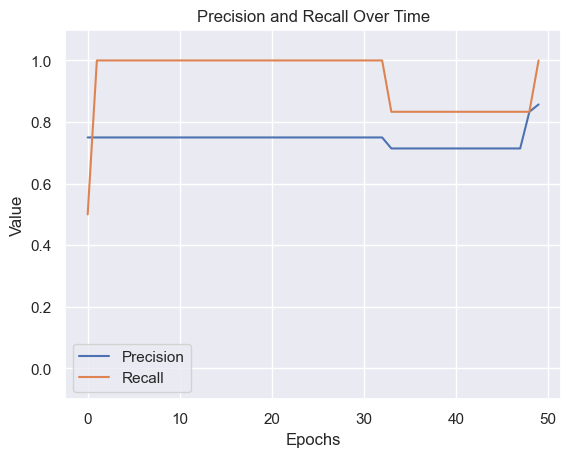

SMOTE PRAN


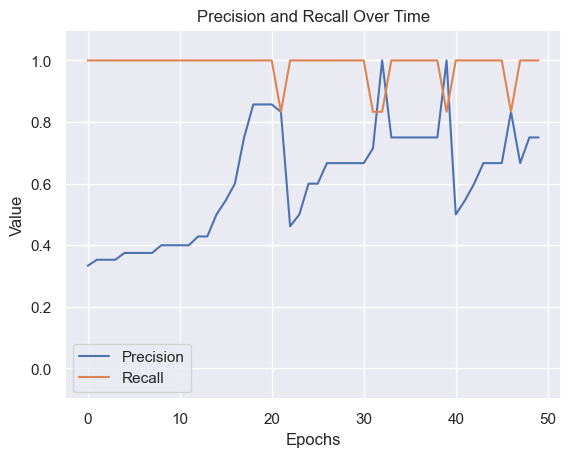

Regular


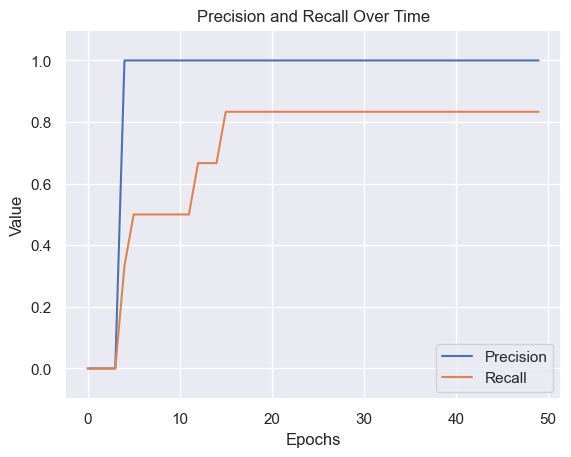

Regular (SMOTE)


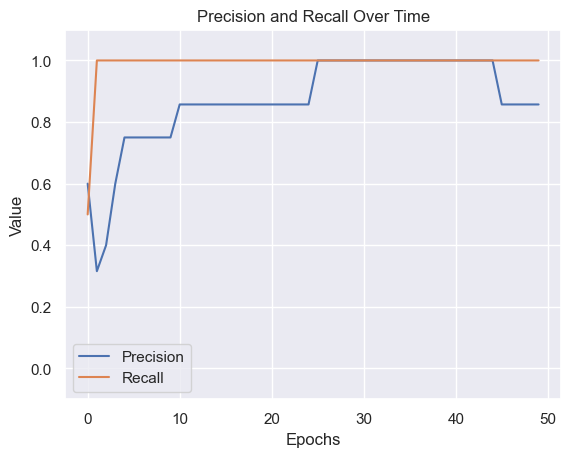

Epoch: 0
Regular PRAN


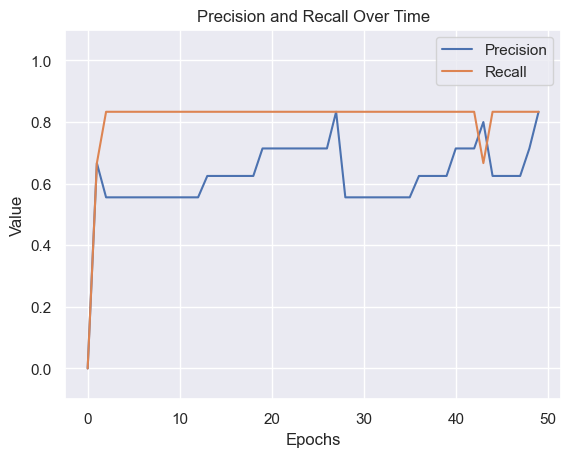

SMOTE PRAN


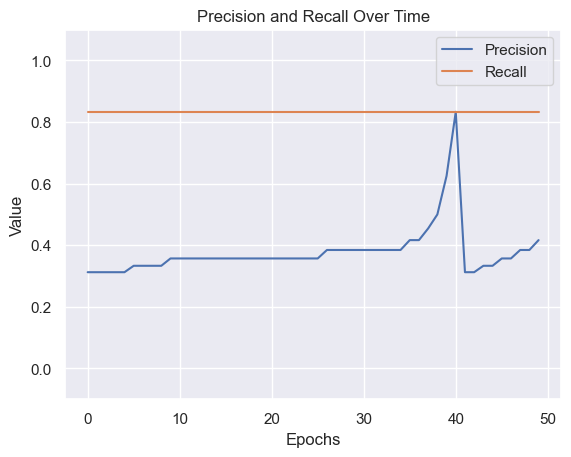

Regular


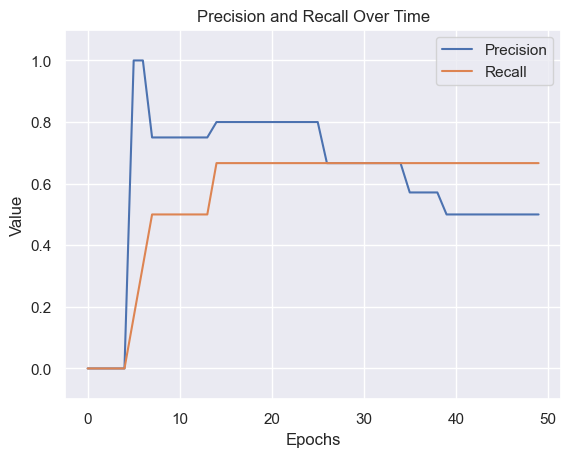

Regular (SMOTE)


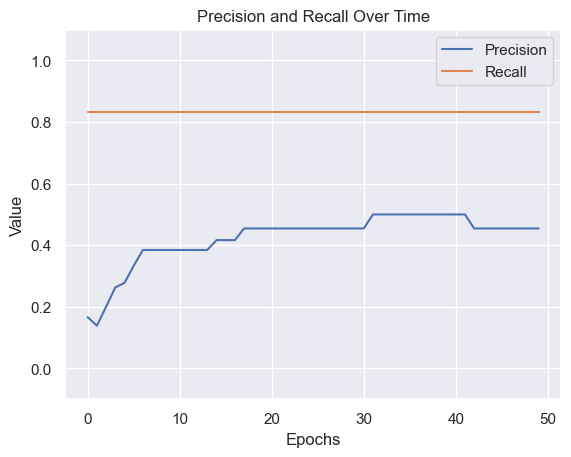

Epoch: 1
Regular PRAN


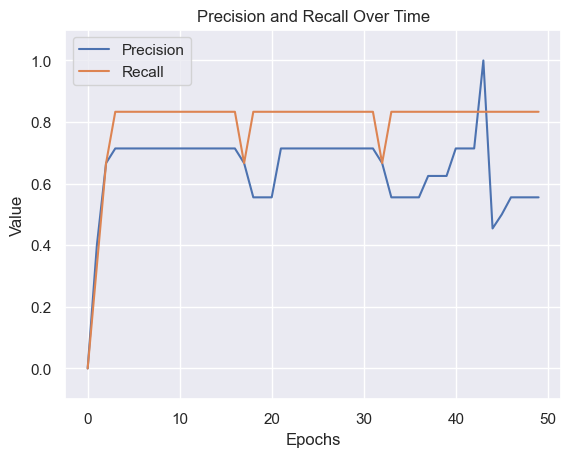

SMOTE PRAN


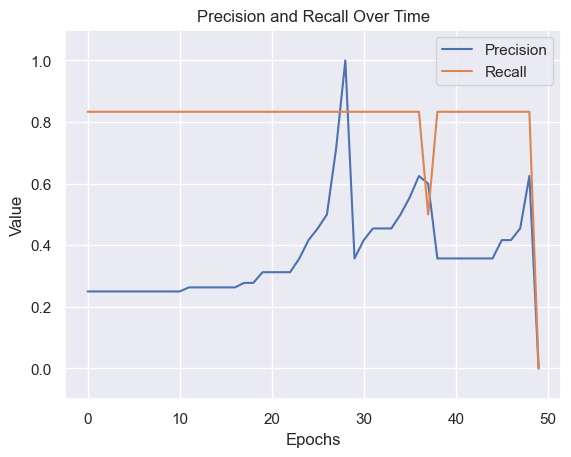

Regular


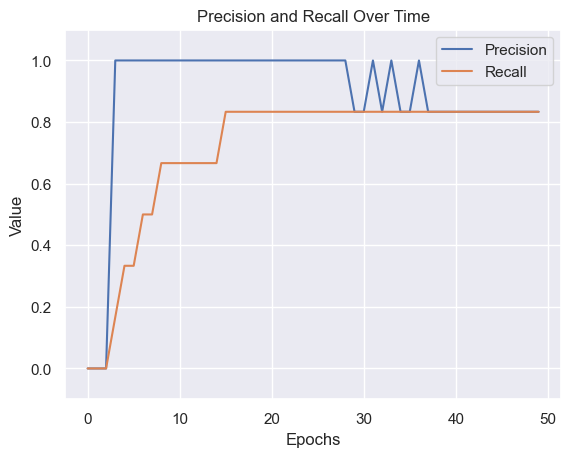

Regular (SMOTE)


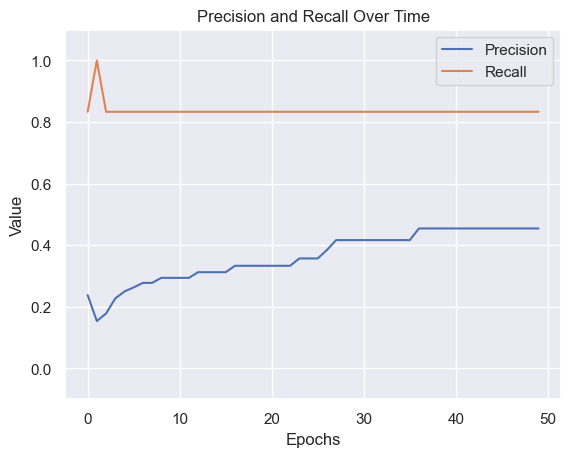

Epoch: 2
Regular PRAN


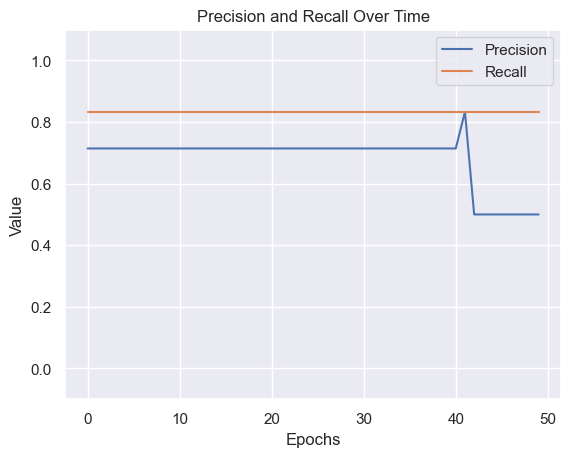

SMOTE PRAN


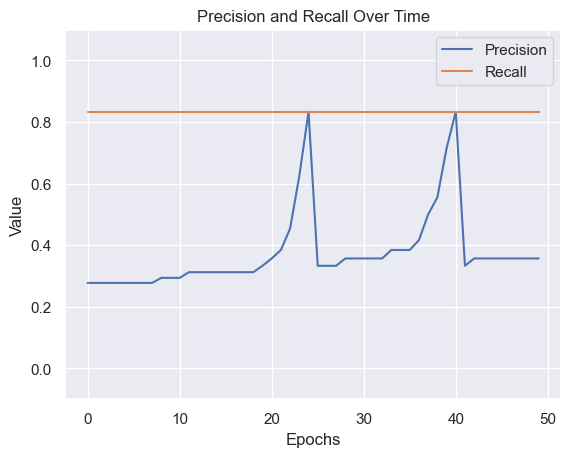

Regular


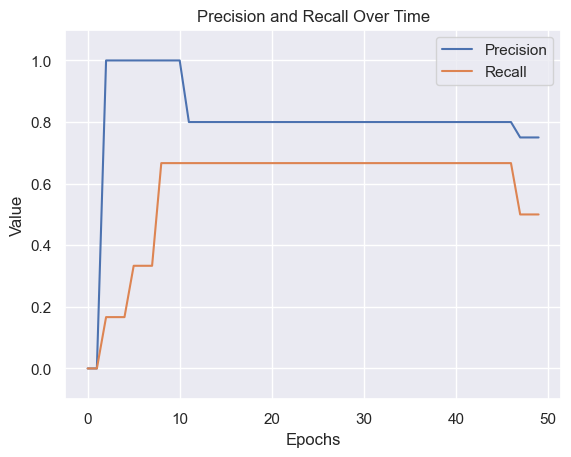

Regular (SMOTE)


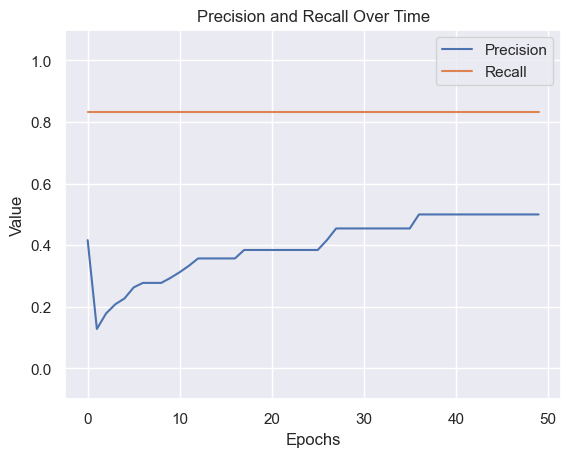

Epoch: 3
Regular PRAN


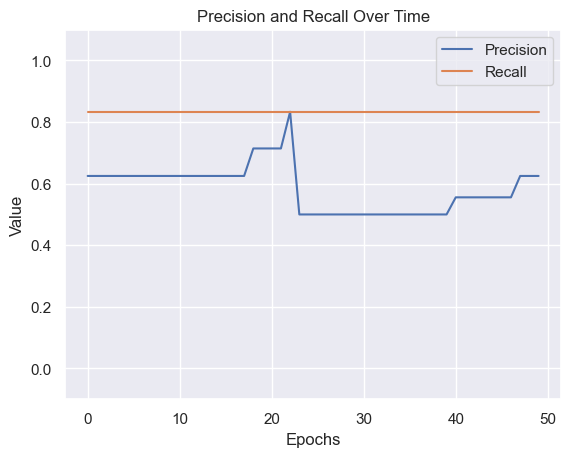

SMOTE PRAN


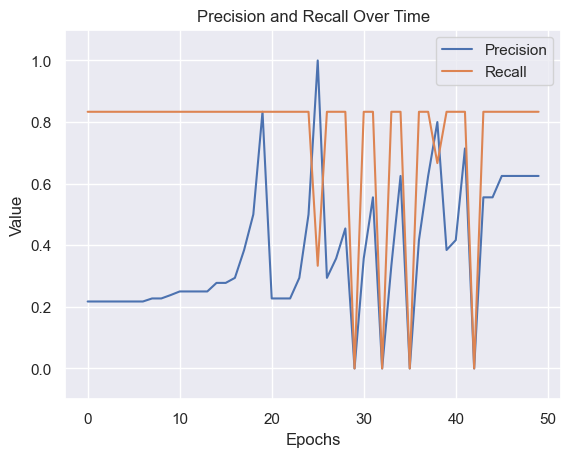

Regular


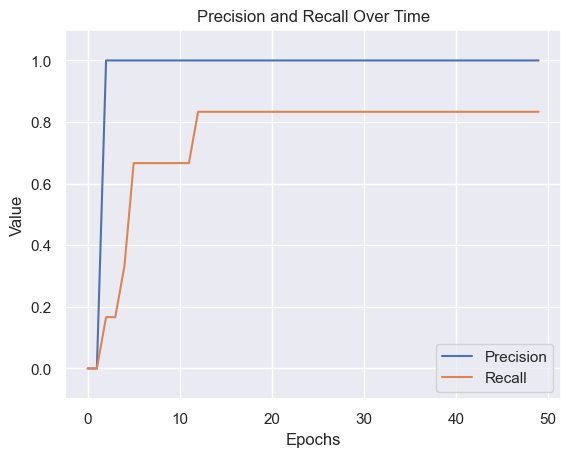

Regular (SMOTE)


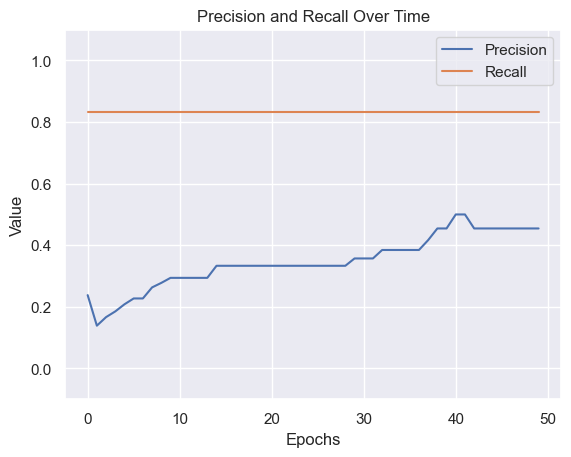

Epoch: 4


In [28]:
total = kFoldCrossVal(df, 'class', 5, 'hyperthyroid')

In [29]:
total.to_csv('hyperthyroid_results.csv')

In [17]:
total.loc[len(total)] = [1, 2, 3]
total

,Run,Fold #1,Fold #2
0,1,2,3
1,1,2,3


In [117]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(pran_f1, control_f1s)
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in performance between models A and B.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference in performance between models A and B.")

Failed to reject the null hypothesis. There is no significant difference in performance between models A and B.


In [118]:
p_value

0.5015333331425821

In [119]:
pran_f1

[0.25, 0.8333333333333334, 0.7272727272727272, 0.7999999999999999, 0.48]

In [120]:
control_f1s

[0.25, 0.4444444444444444, 0.6, 0.7142857142857143, 0.6]

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #14: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #15: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #16: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #17: 
Precision: 0.0
Recall: 0.0 

RB

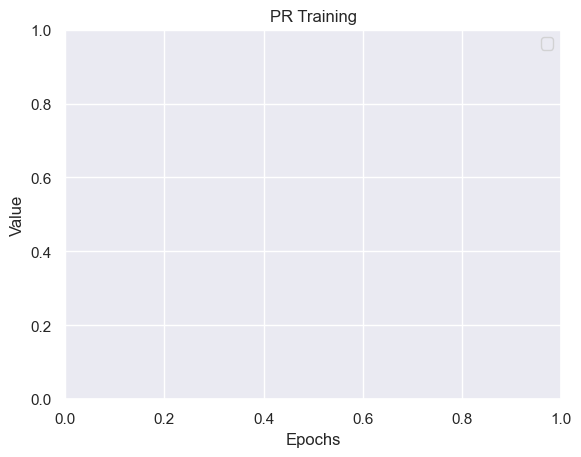

Epoch: 0
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.5
Recall: 0.3333333333333333 

RB Training - 
Epoch #14: 
Precision: 0.5
Recall: 0.3333333333333333 

RB Training - 
Epoch #15: 
Precision: 0.5
Recall: 0.3333333333333333 

RB Training - 
Epoch #16: 
Precision: 0.6666666666666666
Rec

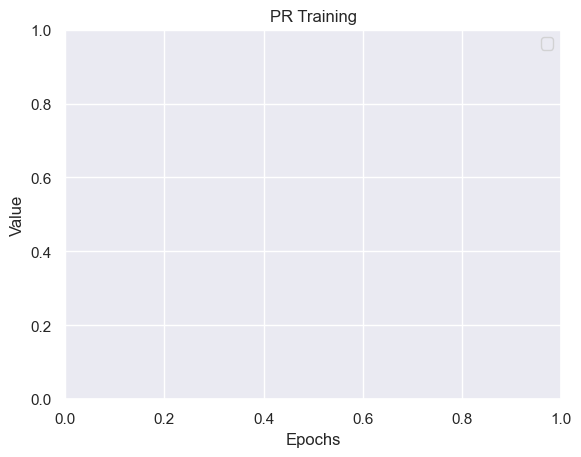

Epoch: 1
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.5
Recall: 0.3333333333333333 

RB Training - 
Epoch #14: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #15: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #16: 
Pre

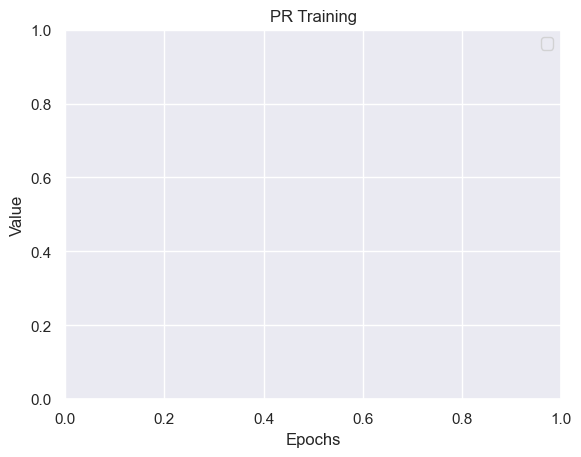

Epoch: 2
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #14: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #15: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #16: 
Precision: 1.0
Recall: 0.3333333333333333 

RB Training - 
Epoch #17: 
Precisi

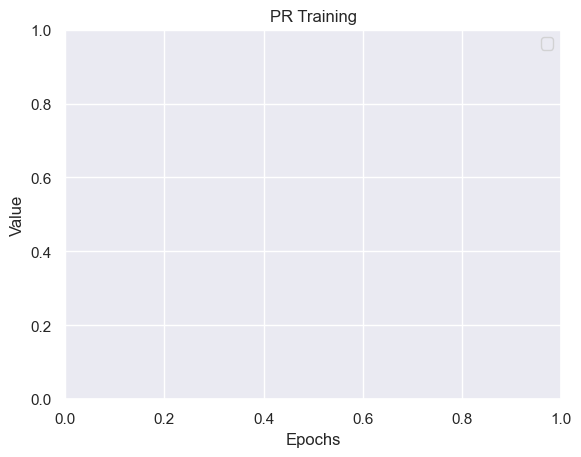

Epoch: 3
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #11: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #12: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #13: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #14: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #15: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 


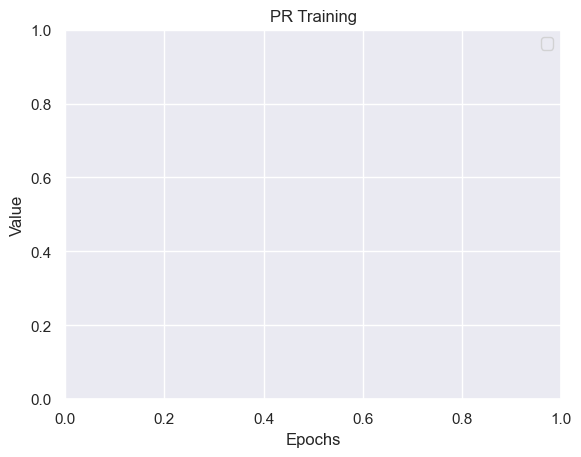

Epoch: 4
Median PRAN Precision:  0.8333333333333334
Median PRAN Recall:  0.7142857142857143
Median PRAN F1:  0.7272727272727272
Mean PRAN Precision:  0.7633333333333334
Mean PRAN Recall:  0.6761904761904762
Mean PRAN F1:  0.6268139268139268


Median Control Precision:  0.75
Median Control Recall:  0.5
Median Control F1:  0.6
Mean Control Precision:  0.7423076923076923
Mean Control Recall:  0.5142857142857143
Mean Control F1:  0.5398778998778998


Median Logistic Regression F1:  0.588235294117647
Median Support Vector Machine F1:  0.6
Median Gaussian NB F1:  0.5217391304347825
Median kNN F1:  0.6
Median Decision Tree F1:  0.6
Mean Logistic Regression F1:  0.5265359477124182
Mean Support Vector Machine F1:  0.48679197994987466
Mean Gaussian NB F1:  0.4840948049924207
Mean kNN F1:  0.4827350427350427
Mean Decision Tree F1:  0.5445098039215687


In [56]:
pran_f1, standard_f1s, control_f1s = kFoldCrossVal(df, 'Class', 5)

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.5
Recall: 0.3333333333333333 

RB Training - 
Epoch #11: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #12: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #13: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #14: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #15: 
Precisio

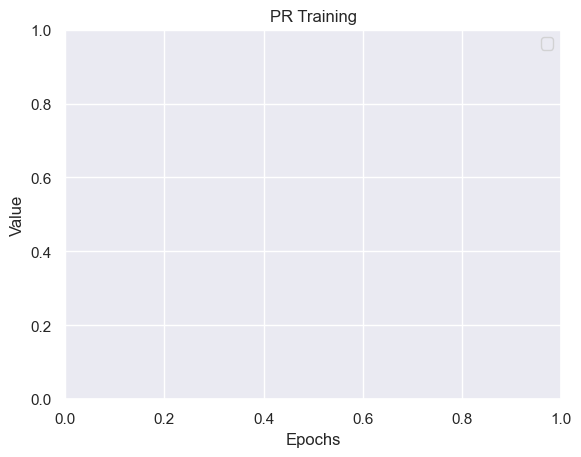

Epoch: 0
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.5
Recall: 0.3333333333333333 

RB Training - 
Epoch #12: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #13: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #14: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #15: 
Precision: 0.6666666666666666

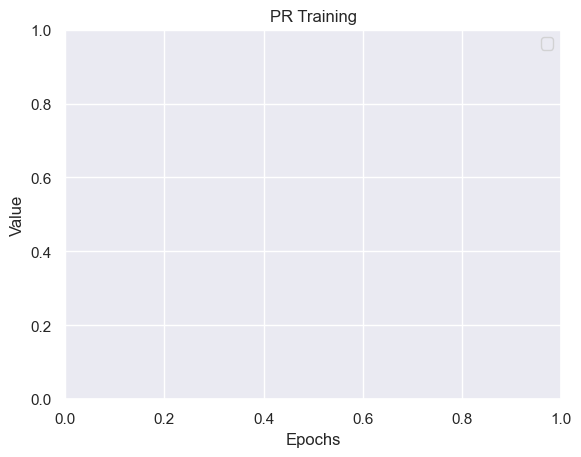

Epoch: 1
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.5
Recall: 0.3333333333333333 

RB Training - 
Epoch #11: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #12: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #13: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #14: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #15: 

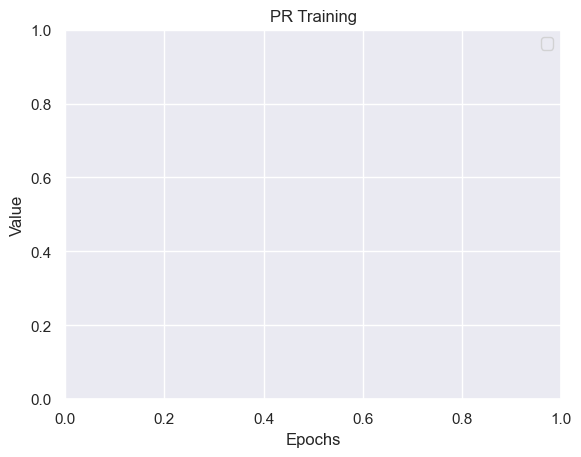

Epoch: 2
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #14: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #15: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #16: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoc

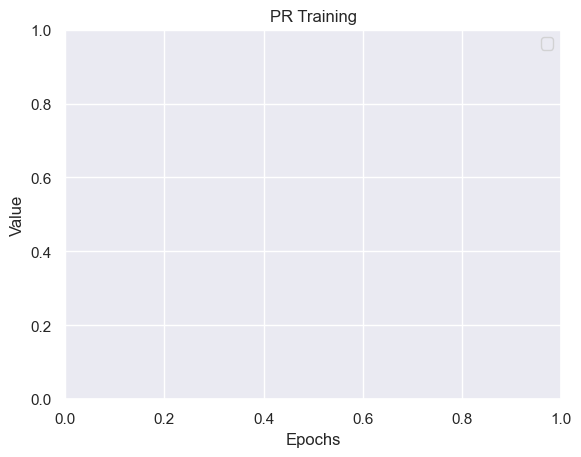

Epoch: 3
RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #9: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #10: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #11: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #12: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #13: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #14: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #15: 
Precision: 1.0
Recall: 0.6666

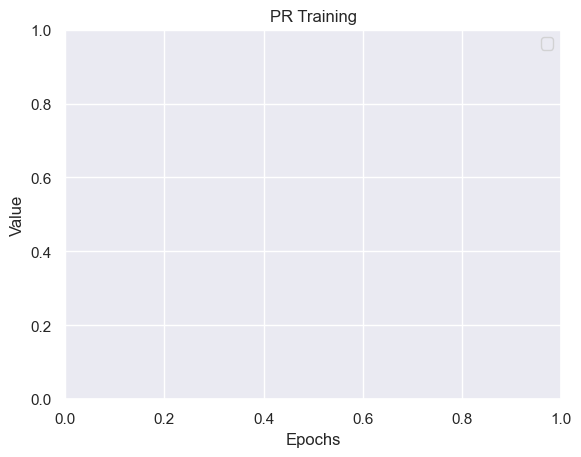

Epoch: 4
Median PRAN Precision:  0.7142857142857143
Median PRAN Recall:  0.8571428571428571
Median PRAN F1:  0.7142857142857143
Mean PRAN Precision:  0.6392857142857143
Mean PRAN Recall:  0.7476190476190477
Mean PRAN F1:  0.6532489249880553


Median Control Precision:  0.75
Median Control Recall:  0.5
Median Control F1:  0.6
Mean Control Precision:  0.7933333333333333
Mean Control Recall:  0.48571428571428565
Mean Control F1:  0.5593650793650793


Median Logistic Regression F1:  0.588235294117647
Median Support Vector Machine F1:  0.6
Median Gaussian NB F1:  0.5217391304347825
Median kNN F1:  0.6
Median Decision Tree F1:  0.7058823529411764
Mean Logistic Regression F1:  0.5265359477124182
Mean Support Vector Machine F1:  0.48679197994987466
Mean Gaussian NB F1:  0.4840948049924207
Mean kNN F1:  0.4827350427350427
Mean Decision Tree F1:  0.587879767291532


In [57]:
pran_f1, standard_f1s, control_f1s = kFoldCrossVal(df, 'Class', 5)

In [58]:
pran_f1

[0.25,
 0.923076923076923,
 0.8571428571428571,
 0.7142857142857143,
 0.5217391304347825]

In [59]:
standard_f1s

[[0.2857142857142857,
  0.6,
  0.4444444444444444,
  0.7142857142857143,
  0.588235294117647],
 [0.2857142857142857, 0.25, 0.6, 0.6666666666666666, 0.631578947368421],
 [0.4444444444444444,
  0.5454545454545454,
  0.5217391304347826,
  0.5217391304347825,
  0.3870967741935483],
 [0.0, 0.6, 0.4444444444444444, 0.7692307692307692, 0.6],
 [0.25, 0.7142857142857143, 0.7692307692307692, 0.5, 0.7058823529411764]]

In [60]:
control_f1s

[0.2857142857142857,
 0.6,
 0.4444444444444444,
 0.6666666666666666,
 0.7999999999999999]

In [61]:
df = pd.read_csv('../src/data/hyperthyroid.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.500000,125.0,1.140000,109.000000,0
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.000000,102.0,0.997912,110.787984,0
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,2.024966,109.0,0.910000,120.000000,0
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.900000,175.0,0.997912,110.787984,0
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.200000,61.0,0.870000,70.000000,0


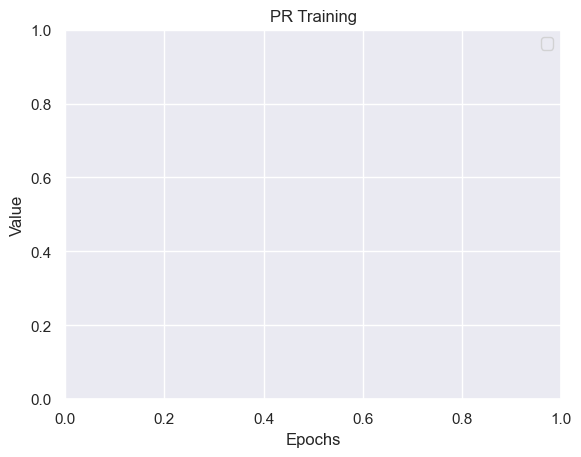

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 1.0
Recall: 0.16666666666666666 

RB Training - 
Epoch #4: 
Precision: 1.0
Recall: 0.5 

RB Training - 
Epoch #5: 
Precision: 1.0
Recall: 0.5 

RB Training - 
Epoch #6: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #7: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #8: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #9: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #10: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #11: 
Precision: 0.8333333333333334
Recall: 0.8333333333333334 

RB Training - 
Epoch #12: 
Precision: 0.8571428571428571
Recall: 1.0 

PB Training - 
Epoch #13: 
Precision: 0.8571428571428571
Recall: 1.0 

PB Training - 
Epoch #14: 
Precision: 0.8571428571428571
Recall: 1.0 

PB T

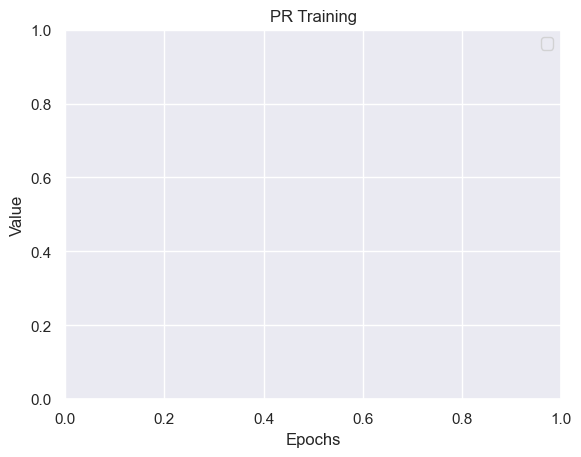

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #3: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #4: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #5: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #6: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #7: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #8: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #9: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #10: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #11: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #12: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #13: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #14: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #15: 
Precision: 1.0
Recall: 0.5 

RB Training - 
Epoch #16: 
Precision: 1.0
Recall: 0.5 

RB Training - 
Epoch #17: 
Precision: 0.8
Recall: 0.666666

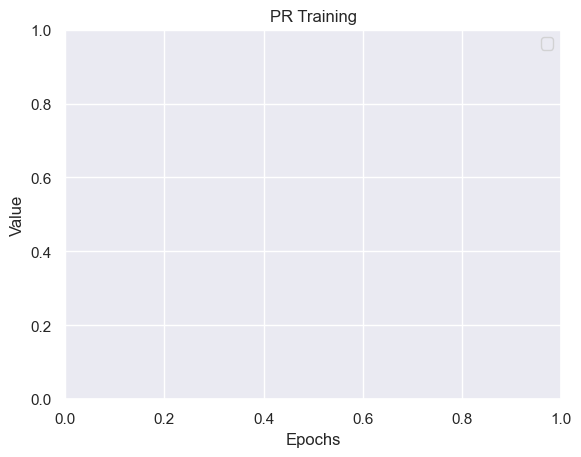

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 1.0
Recall: 0.16666666666666666 

RB Training - 
Epoch #3: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #4: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #5: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #6: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 0.7142857142857143
Recall: 0.833333333333333

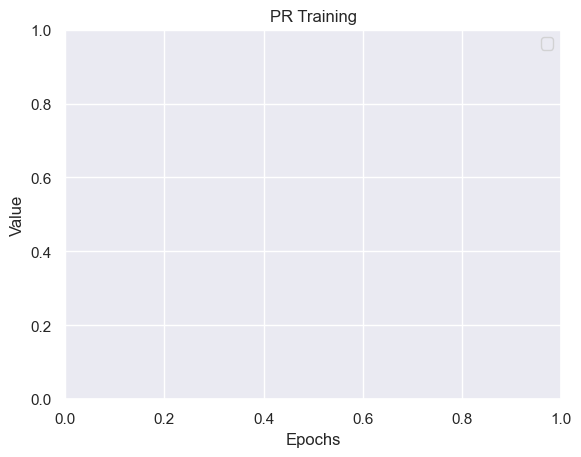

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #2: 
Precision: 1.0
Recall: 0.16666666666666666 

RB Training - 
Epoch #3: 
Precision: 1.0
Recall: 0.3333333333333333 

RB Training - 
Epoch #4: 
Precision: 1.0
Recall: 0.5 

RB Training - 
Epoch #5: 
Precision: 0.8333333333333334
Recall: 0.8333333333333334 

RB Training - 
Epoch #6: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training

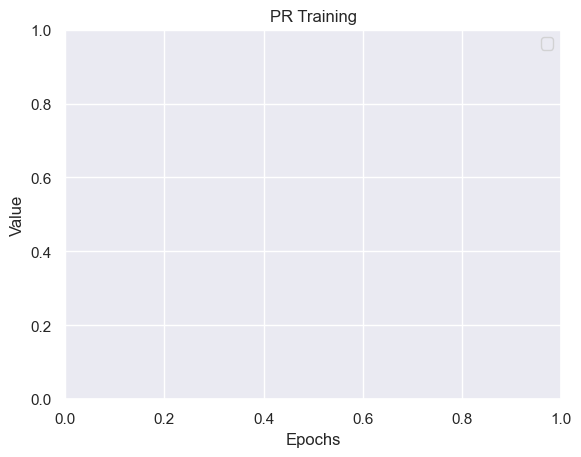

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 1.0
Recall: 0.16666666666666666 

RB Training - 
Epoch #2: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #3: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #4: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #5: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #6: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #7: 
Precision: 0.8333333333333334
Recall: 0.8333333333333334 

RB Training - 
Epoch #8: 
Precision: 0.8333333333333334
Recall: 0.8333333333333334 

RB Training - 
Epoch #9: 
Precision: 0.8333333333333334
Recall: 0.8333333333333334 

RB Training - 
Epoch #10: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training

In [91]:
pran_f1, standard_f1s, control_f1s = kFoldCrossVal(df, 'class', 5)

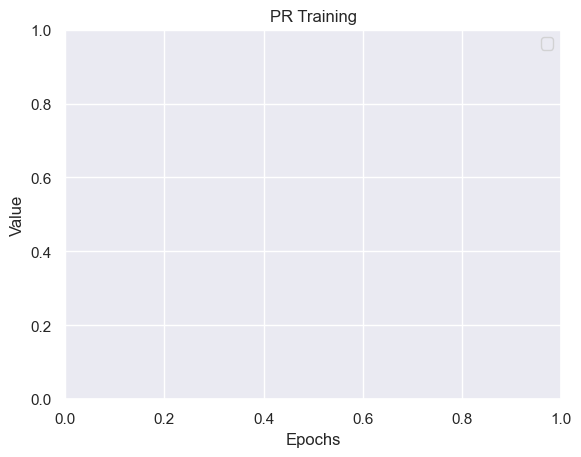

RB Training - 
Epoch #0: 
Precision: 1.0
Recall: 0.6666666666666666 

RB Training - 
Epoch #1: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #2: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.7142857142857143
Recall: 0.833333333333

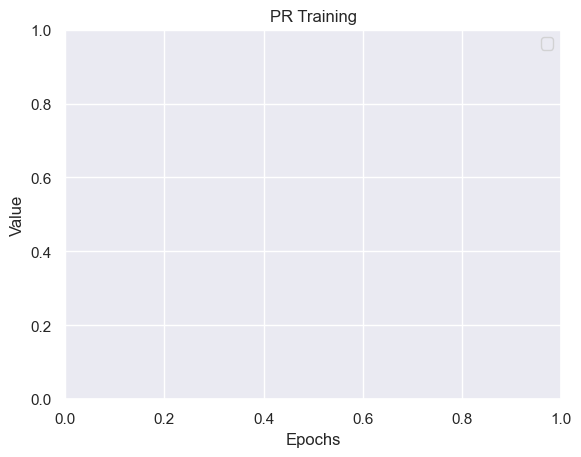

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.75
Recall: 0.5 

RB Training - 
Epoch #2: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision:

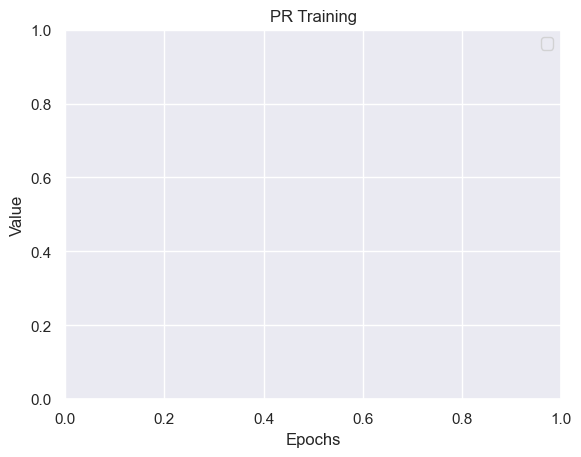

RB Training - 
Epoch #0: 
Precision: 0.0
Recall: 0.0 

RB Training - 
Epoch #1: 
Precision: 0.5714285714285714
Recall: 0.6666666666666666 

PB Training - 
Epoch #2: 
Precision: 0.5714285714285714
Recall: 0.6666666666666666 

PB Training - 
Epoch #3: 
Precision: 0.5714285714285714
Recall: 0.6666666666666666 

PB Training - 
Epoch #4: 
Precision: 0.5714285714285714
Recall: 0.6666666666666666 

PB Training - 
Epoch #5: 
Precision: 0.6666666666666666
Recall: 0.6666666666666666 

RB Training - 
Epoch #6: 
Precision: 0.5
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.5
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.5555555555555556
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 

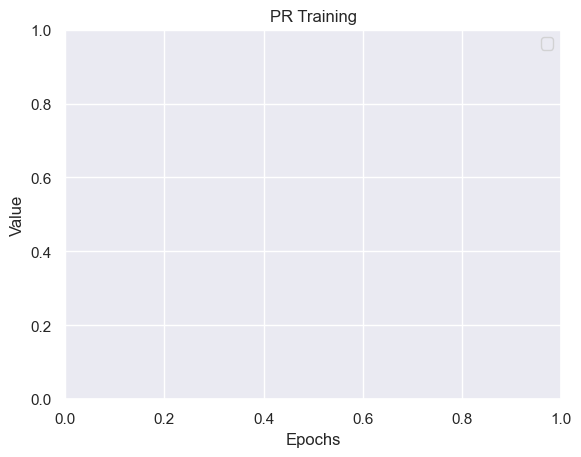

RB Training - 
Epoch #0: 
Precision: 1.0
Recall: 0.8333333333333334 

RB Training - 
Epoch #1: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #2: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #12: 
Precision: 0.625
Recall: 0.8333333333333334 

PB Training - 
Epoch #13: 
Precision: 0.625
Recall: 0.833333333

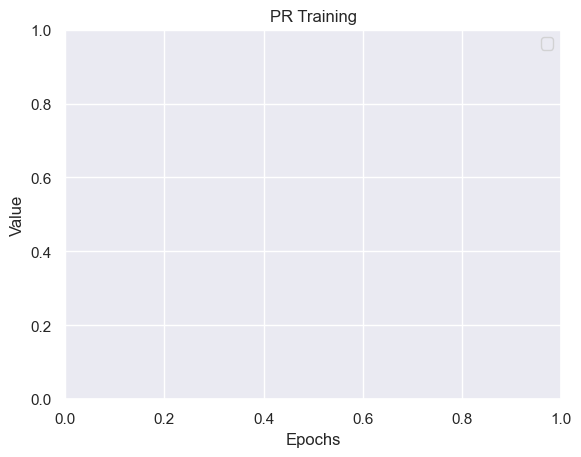

RB Training - 
Epoch #0: 
Precision: 0.8
Recall: 0.6666666666666666 

RB Training - 
Epoch #1: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #2: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #3: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #4: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #5: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #6: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #7: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #8: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #9: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #10: 
Precision: 0.7142857142857143
Recall: 0.8333333333333334 

PB Training - 
Epoch #11: 
Precision: 0.7142857142857143
Recall: 0.833333333333

In [97]:
pran_f1, standard_f1s, control_f1s = kFoldCrossVal(df, 'class', 5)

In [99]:
df = pd.read_csv('../src/data/wbpc.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,person_id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concavity,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor size,lymph node status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [33]:
pran_f1, standard_f1s, control_f1s = kFoldCrossVal(df, 'outcome', 5)

KeyError: 'outcome'

In [75]:
pran_f1

[0.4848484848484848, 0.0, 0.6153846153846153, 0.6923076923076923, 0.0]

In [76]:
standard_f1s

[[0.48,
  0.6428571428571429,
  0.7142857142857142,
  0.7142857142857143,
  0.38095238095238093],
 [0.4545454545454545, 0.4615384615384615, 0.64, 0.6666666666666666, 0.5],
 [0.05726872246696035,
  0.058939096267190565,
  0.05882352941176471,
  0.0594059405940594,
  0.055999999999999994],
 [0.5925925925925926,
  0.4827586206896552,
  0.5925925925925926,
  0.6666666666666666,
  0.5833333333333334],
 [0.4666666666666667,
  0.5161290322580646,
  0.6923076923076923,
  0.7333333333333334,
  0.5217391304347825]]

In [77]:
control_f1s

[0.5333333333333333,
 0.6666666666666666,
 0.6428571428571429,
 0.7586206896551724,
 0.3]

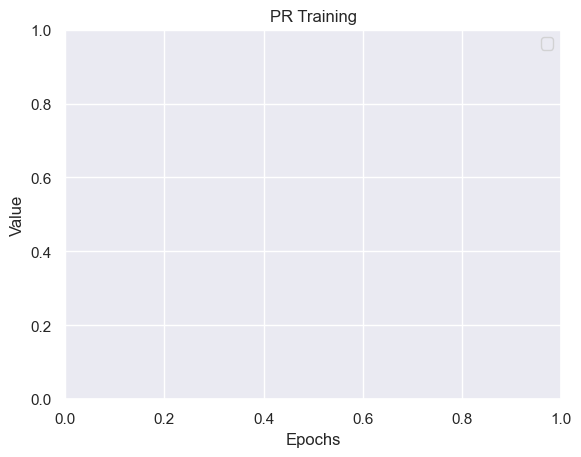

RB Training - 
Epoch #0: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #1: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #2: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #3: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #4: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #5: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #6: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #7: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #8: 
Precision: 0.4
Recall: 0.5 

PB Training - 
Epoch #9: 
Precision: 0.4
Recall: 0.5 

PB Training - 
Epoch #10: 
Precision: 0.25
Recall: 0.25 

RB Training - 
Epoch #11: 
Precision: 0.3
Recall: 0.75 

PB Training - 
Epoch #12: 
Precision: 0.3
Recall: 0.75 

PB Training - 
Epoch #13: 
Precision: 0.3
Recall: 0.75 

PB Training - 
Epoch #14: 
Precision: 0.3
Recall: 0.75 

PB Training - 
Epoch #15: 
Precision: 0.3
Recall: 0.75 

PB Training - 
Epoch #16: 
Precision: 0.3
Recall: 0.75 

PB Training - 
Epoch #17: 
Precision: 0.3


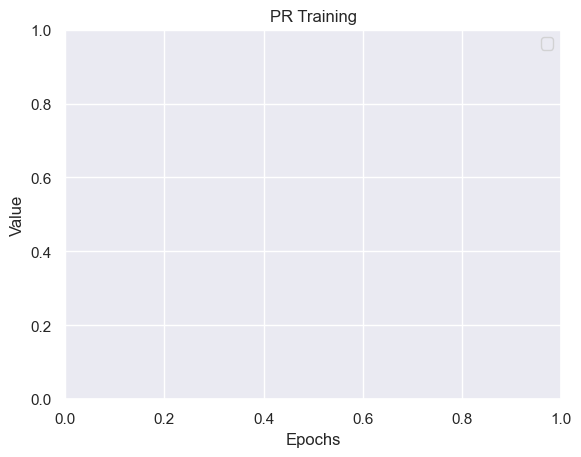

RB Training - 
Epoch #0: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #1: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #2: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #3: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #4: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #5: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #6: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #7: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #8: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #9: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #10: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #11: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #12: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #13: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #14: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #15: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #16: 
Precision: 0.5
Recall: 0.75 

PB Training - 
Epoch #17: 
Precision: 0.5

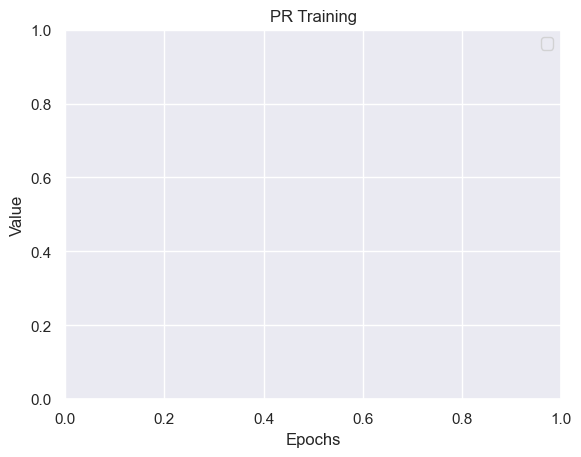

RB Training - 
Epoch #0: 
Precision: 0.4444444444444444
Recall: 1.0 

PB Training - 
Epoch #1: 
Precision: 0.4444444444444444
Recall: 1.0 

PB Training - 
Epoch #2: 
Precision: 0.4444444444444444
Recall: 1.0 

PB Training - 
Epoch #3: 
Precision: 0.4444444444444444
Recall: 1.0 

PB Training - 
Epoch #4: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #5: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #6: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #7: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #8: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #9: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #10: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #11: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #12: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #13: 
Precision: 0.42857142857142855
Recall: 0.75 

PB Training - 
Epoch #14: 
Precision: 0.42857142857142855
Recall: 0.75 

PB Training - 
Epoch #15: 
Precision: 0.42857142857142855
Recall: 0.75 

PB 

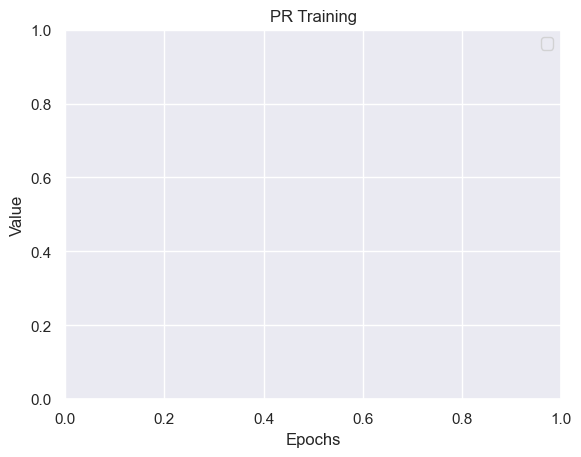

RB Training - 
Epoch #0: 
Precision: 1.0
Recall: 0.25 

RB Training - 
Epoch #1: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #2: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #3: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #4: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #5: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #6: 
Precision: 0.5
Recall: 1.0 

PB Training - 
Epoch #7: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #8: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #9: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #10: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #11: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #12: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #13: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #14: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #15: 
Precision: 0.666666666

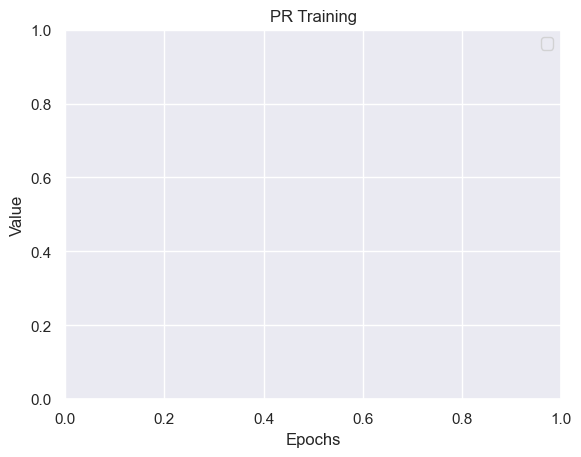

RB Training - 
Epoch #0: 
Precision: 0.5714285714285714
Recall: 1.0 

PB Training - 
Epoch #1: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #2: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #3: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #4: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #5: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #6: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #7: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #8: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #9: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #10: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #11: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #12: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
Epoch #13: 
Precision: 0.6666666666666666
Recall: 1.0 

PB Training - 
E

In [51]:
pran_f1, standard_f1s, control_f1s = kFoldCrossVal(df, 'status', 5)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis = 1), df['Class'], test_size=0.1, random_state=1, stratify=df['Class'])
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
# X_val = sc.transform(X_val)

In [83]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 8, lr_pb = 1e-3, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 5, X_test = X_test, y_test = y_test)
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision Score:  0.75
Recall Score:  1.0
F1 Score:  0.8571428571428571


In [115]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train_resampled, y_train = y_train_resampled, epochs = 50, batch_size = 8, lr_pb = 1e-3, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 5, X_test = X_test, y_test = y_test)
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision Score:  0.6
Recall Score:  1.0
F1 Score:  0.7499999999999999


In [84]:
f1_lr, f1_svm, f1_gnb, f1_knn, f1_dt = testAllModels(X_train, y_train, X_test, y_test)
print("LR F1: ", f1_lr)
print("SVM F1: ", f1_svm)
print("GNB F1: ", f1_gnb)
print("KNN F1: ", f1_knn)
print("DT F1: ", f1_dt)

LR F1:  0.6666666666666666
SVM F1:  0.6666666666666666
GNB F1:  0.42857142857142855
KNN F1:  0.6666666666666666
DT F1:  0.4444444444444444


In [85]:
f1_lr, f1_svm, f1_gnb, f1_knn, f1_dt = testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print("LR F1: ", f1_lr)
print("SVM F1: ", f1_svm)
print("GNB F1: ", f1_gnb)
print("KNN F1: ", f1_knn)
print("DT F1: ", f1_dt)

LR F1:  0.5714285714285715
SVM F1:  0.6666666666666666
GNB F1:  0.5
KNN F1:  0.5454545454545454
DT F1:  0.8571428571428571


In [98]:
df = pd.read_csv('../src/data/wbpc.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,person_id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concavity,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor size,lymph node status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis = 1), df['class'], test_size=0.1, random_state=1, stratify=df['class'])
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
# X_val = sc.transform(X_val)

In [89]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train, y_train = y_train, epochs = 50, batch_size = 32, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 8, X_test = X_test, y_test = y_test)
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision Score:  1.0
Recall Score:  0.5
F1 Score:  0.6666666666666666


In [92]:
import warnings
warnings.filterwarnings("ignore")

pran2 = PRAN(shape = X_train.shape[1])
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pran2.fit(X_train = X_train_resampled, y_train = y_train_resampled, epochs = 50, batch_size = 32, lr_pb = 1e-5, lr_rb = 1e-2, l2_pb = 1e-3, l2_rb = 0, beta_pb = 0, beta_rb = 8, X_test = X_test, y_test = y_test)
y_pred = pran2.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Precision Score:  1.0
Recall Score:  0.5
F1 Score:  0.6666666666666666


In [90]:
f1_lr, f1_svm, f1_gnb, f1_knn, f1_dt = testAllModels(X_train, y_train, X_test, y_test)
print("LR F1: ", f1_lr)
print("SVM F1: ", f1_svm)
print("GNB F1: ", f1_gnb)
print("KNN F1: ", f1_knn)
print("DT F1: ", f1_dt)

LR F1:  0.7692307692307693
SVM F1:  0.6666666666666666
GNB F1:  0.06349206349206349
KNN F1:  0.5454545454545454
DT F1:  0.42857142857142855


In [91]:
f1_lr, f1_svm, f1_gnb, f1_knn, f1_dt = testAllModels(X_train_resampled, y_train_resampled, X_test, y_test)
print("LR F1: ", f1_lr)
print("SVM F1: ", f1_svm)
print("GNB F1: ", f1_gnb)
print("KNN F1: ", f1_knn)
print("DT F1: ", f1_dt)

LR F1:  0.4285714285714285
SVM F1:  0.5
GNB F1:  0.07619047619047618
KNN F1:  0.7000000000000001
DT F1:  0.5


In [116]:
df = pd.read_csv('../src/data/wbpc.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,person_id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concavity,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor size,lymph node status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
